# PS05 - Regression
## Name: Kaylee Cho
### Date: 2023/05/01

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

#### 1) When will we hit 2C of global warming?

**1) Load data. Ensure it looks good.**

In [3]:
hadcrut = pd.read_csv("./Data/hadcrut-5.0.1.0-annual.csv")
hadcrut.head()

,Time,Anomaly (deg C),Lower confidence limit (2.5%),Upper confidence limit (97.5%)
0,1850,-0.417659,-0.589203,-0.246115
1,1851,-0.233350,-0.411868,-0.054832
2,1852,-0.229399,-0.409382,-0.049416
3,1853,-0.270354,-0.430009,-0.110700
4,1854,-0.291630,-0.432824,-0.150436


In [4]:
hadcrut.isna().sum()

Time                              0
Anomaly (deg C)                   0
Lower confidence limit (2.5%)     0
Upper confidence limit (97.5%)    0
dtype: int64

**2) Make a plot of the temperature anomaly for all years in the dataset. Describe what you see-how has the global temperature behaved through the last 170 years?**

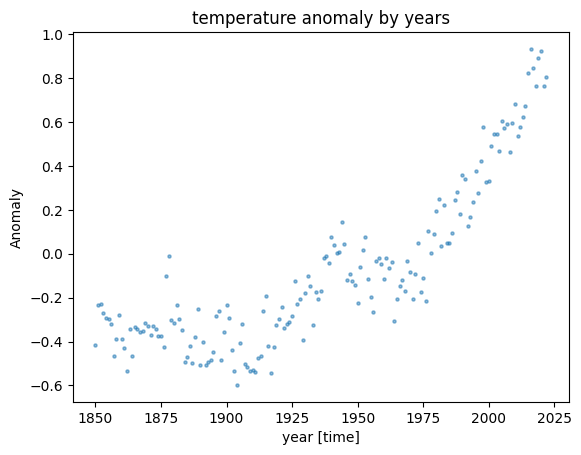

In [5]:
_ = plt.scatter(hadcrut['Time'], hadcrut['Anomaly (deg C)'], s=5, alpha=0.5)
_ = plt.title("temperature anomaly by years")
_ = plt.xlabel("year [time]")
_ = plt.ylabel("Anomaly")
_ = plt.show()

## Baseline Anomaly

**1) Compute the baseline anomaly (for 1850 - 1900).**
\
Baseline anomaly means anomaly for 1850 - 1900.

In [18]:
hadcrut.rename(columns = {'Anomaly (deg C)':'Anomaly'}, inplace = True)
hadcrut_time = hadcrut[(hadcrut['Time'] >= 1850) & (hadcrut['Time'] <= 1900)]
baseline_anomaly = np.mean(hadcrut_time['Anomaly'])
baseline_anomaly

-0.35650217072549023

## Plot

**2) Make a plot that shows the last 60 years of data, overlied with the regression line. In your opinion - does the regression line describe the trend well?**
\
try using sns.regplot instead of matplotlib

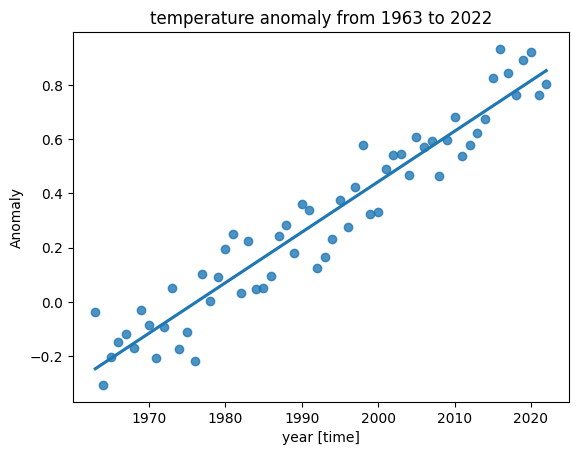

In [21]:
hadcrut = pd.read_csv("./Data/hadcrut-5.0.1.0-annual.csv")
hadcrut_current = hadcrut[(hadcrut['Time'] >= 1963) & (hadcrut['Time'] <= 2022)]
x = hadcrut_current['Time']
hadcrut_current_anomaly = hadcrut_current['Anomaly (deg C)']
y = hadcrut_current_anomaly
_ = sns.regplot(x=x, y=y, ci=None)
_ = plt.title("temperature anomaly from 1963 to 2022")
_ = plt.xlabel("year [time]")
_ = plt.ylabel("Anomaly")
_ = plt.show()

**3) Keep in mind that we have a problem with this dataset: Anomaly is reported with reference to the 1961 - 1990 period. In order to normalize the data, create a new column that describes the temperature anomaly above the pre-industrial baseline (that is what you calculated in Q1.1 above)**

In [53]:
above_baseline = hadcrut[(hadcrut['Time'] > 1900)]
hadcrut.rename(columns = {'Anomaly (deg C)':'Anomaly'}, inplace = True)
hadcrut['new_anomaly'] = hadcrut['Anomaly'] - baseline_anomaly
hadcrut_60years = hadcrut[(hadcrut['Time'] >= 1963) & (hadcrut['Time'] <= 2022)]

**4) Esimate a linear regression model where you describe the anomaly above the preindustrial baseline (this is what you calculated in Q1.3 above) as a function of years. How large is R^2? What does this number tell you?**

In [54]:
m = smf.ols(formula='new_anomaly ~ Time', data=hadcrut_60years).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            new_anomaly   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     665.3
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.80e-33
Time:                        15:17:56   Log-Likelihood:                 55.935
No. Observations:                  60   AIC:                            -107.9
Df Residuals:                      58   BIC:                            -103.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.4592      1.439    -25.335      0.000     -39.340     -33.578
Time           0.0186      0.001     25.794      0.000       0.017       0.020
==============================================================================
Omnibus:                        2.154   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.385
Skew:                           0.061   Prob(JB):                        0.500
Kurtosis:                       2.266   Cond. No.                     2.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R^2 value is 0.920 here which is fairly high indicating that 92% of the variability in the new_period value is explained by the Time variables included in the model. 

**5) Interpret the coefficients. What does the slope mean? Is it statistically significant?**

The coefficients for the independent variable 'Time' is -36.4592 which means that assuming everything else is constant if one unit of Time increases, 'new_anomaly' value increases by 0.0186. Regarding that the p value for everything is 0, we can tell that all variables are statistically significant.

**6) What does the intercept mean if 
\
(a) you use years as is (1999, 2000, 2001, ...)?\
(b) you use years relative to 2000(-1, 0, 1,...)?
Is it statistically significant?**

In [56]:
hadcrut_1999 = hadcrut[(hadcrut['Time'] >= 1999)]
m = smf.ols(formula='new_anomaly ~ Time', data=hadcrut_60years).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            new_anomaly   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     665.3
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.80e-33
Time:                        15:18:04   Log-Likelihood:                 55.935
No. Observations:                  60   AIC:                            -107.9
Df Residuals:                      58   BIC:                            -103.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.4592      1.439    -25.335      0.000     -39.340     -33.578
Time           0.0186      0.001     25.794      0.000       0.017       0.020
==============================================================================
Omnibus:                        2.154   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.385
Skew:                           0.061   Prob(JB):                        0.500
Kurtosis:                       2.266   Cond. No.                     2.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Not using the relative year, the intercept is the predicted anomaly above the preindustrial baseline for the year 0.

In [57]:
hadcrut['new_time'] = (hadcrut['Time'] - 2000)
hadcrut_1999 = hadcrut[(hadcrut['Time'] >= 1999)]
m = smf.ols(formula='new_anomaly ~ new_time', data=hadcrut_60years).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            new_anomaly   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     665.3
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.80e-33
Time:                        15:18:08   Log-Likelihood:                 55.935
No. Observations:                  60   AIC:                            -107.9
Df Residuals:                      58   BIC:                            -103.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7996      0.014     58.663      0.000       0.772       0.827
new_time       0.0186      0.001     25.794      0.000       0.017       0.020
==============================================================================
Omnibus:                        2.154   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.385
Skew:                           0.061   Prob(JB):                        0.500
Kurtosis:                       2.266   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using relative year, the intercept is the predicted anomaly above the preindustrial baseline for the year 2000.

**7) Use the intercept and slope, and compute how much above the pre-industrial baseline is the world now, in 2022.**

In [158]:
a = 0.7996 + 0.0186 * (22)
print(a)

1.2087999999999999


**8) Now use the slope and intercept to find which year will the trend hit 1.5C, and when will it hit 2C.**
\
**Hint: we should hit 1.5 degrees ~ 2038, and 2C around the time of your retirement.**

In [204]:
x = (1.5 + 36.4592) / 0.0186
print(x)
y = (2.0 + 36.4592) / 0.0186
print(y)

2040.8172043010757
2067.698924731183


**9) Now think about these two threshold years you computed. What do you think, might the thersholds be actually crossed earlier or later than what you computed, or maybe not at all?**

I think the temperature itself will cross earlier than what we computed above since global warming problems are getting severe and more serious as time goes by.

## 2) How is bascketball game score Calculated?

1)

In [132]:
harden = pd.read_csv("harden-21-22.csv", sep=",")
harden.shape
harden

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2021-10-19,32-054,BRK,@,MIL,L (-23),1,30:38,...,5,8,8,1,2,4,3,20,17.6,-20
1,2,2.0,2021-10-22,32-057,BRK,@,PHI,W (+5),1,38:25,...,6,7,8,2,0,5,0,20,15.6,-1
2,3,3.0,2021-10-24,32-059,BRK,NaN,CHO,L (-16),1,33:09,...,5,7,8,1,1,8,5,15,6.4,-15
3,4,4.0,2021-10-25,32-060,BRK,NaN,WAS,W (+14),1,30:25,...,5,6,9,1,1,2,1,14,11.9,+6
4,5,5.0,2021-10-27,32-062,BRK,NaN,MIA,L (-13),1,35:36,...,7,7,7,1,1,4,3,14,10.7,-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,79,62.0,2022-04-03,32-220,PHI,@,CLE,W (+4),1,40:34,...,6,10,10,0,0,4,2,21,19.9,+4
79,80,63.0,2022-04-05,32-222,PHI,@,IND,W (+9),1,40:17,...,3,3,14,1,0,4,2,11,12.1,+7
80,81,64.0,2022-04-07,32-224,PHI,@,TOR,L (-5),1,39:27,...,4,4,15,0,0,3,1,13,14.1,+7
81,82,65.0,2022-04-09,32-226,PHI,NaN,IND,W (+13),1,38:40,...,4,4,14,1,0,5,2,22,19.8,+12


2)

In [133]:
inactive = harden['MP'] == "Inactive"
dnd = harden['MP'] == "Did Not Dress"
dnp = harden['MP'] == "Did Not Play"
harden = harden[~inactive & ~dnd & ~dnp]
harden
# total of 65 games

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2021-10-19,32-054,BRK,@,MIL,L (-23),1,30:38,...,5,8,8,1,2,4,3,20,17.6,-20
1,2,2.0,2021-10-22,32-057,BRK,@,PHI,W (+5),1,38:25,...,6,7,8,2,0,5,0,20,15.6,-1
2,3,3.0,2021-10-24,32-059,BRK,NaN,CHO,L (-16),1,33:09,...,5,7,8,1,1,8,5,15,6.4,-15
3,4,4.0,2021-10-25,32-060,BRK,NaN,WAS,W (+14),1,30:25,...,5,6,9,1,1,2,1,14,11.9,+6
4,5,5.0,2021-10-27,32-062,BRK,NaN,MIA,L (-13),1,35:36,...,7,7,7,1,1,4,3,14,10.7,-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,61.0,2022-04-02,32-219,PHI,NaN,CHO,W (+30),1,30:56,...,6,8,13,1,0,5,1,12,14.5,+27
78,79,62.0,2022-04-03,32-220,PHI,@,CLE,W (+4),1,40:34,...,6,10,10,0,0,4,2,21,19.9,+4
79,80,63.0,2022-04-05,32-222,PHI,@,IND,W (+9),1,40:17,...,3,3,14,1,0,4,2,11,12.1,+7
80,81,64.0,2022-04-07,32-224,PHI,@,TOR,L (-5),1,39:27,...,4,4,15,0,0,3,1,13,14.1,+7


3)

In [134]:
harden = harden.loc[ :, 'Date':'GmSc']
harden = harden.drop(columns=['Unnamed: 5', 'Unnamed: 7'])
harden['GmSc'] = pd.to_numeric(harden['GmSc'], downcast="float")
harden['FGA'] = pd.to_numeric(harden['FGA'], downcast="float")
harden['FG'] = pd.to_numeric(harden['FG'], downcast="float")
harden

,Date,Age,Tm,Opp,GS,MP,FG,FGA,FG%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
0,2021-10-19,32-054,BRK,MIL,1,30:38,6.0,16.0,.375,4,...,3,5,8,8,1,2,4,3,20,17.600000
1,2021-10-22,32-057,BRK,PHI,1,38:25,7.0,17.0,.412,3,...,1,6,7,8,2,0,5,0,20,15.600000
2,2021-10-24,32-059,BRK,CHO,1,33:09,6.0,16.0,.375,2,...,2,5,7,8,1,1,8,5,15,6.400000
3,2021-10-25,32-060,BRK,WAS,1,30:25,5.0,17.0,.294,1,...,1,5,6,9,1,1,2,1,14,11.900000
4,2021-10-27,32-062,BRK,MIA,1,35:36,4.0,12.0,.333,3,...,0,7,7,7,1,1,4,3,14,10.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2022-04-02,32-219,PHI,CHO,1,30:56,4.0,10.0,.400,2,...,2,6,8,13,1,0,5,1,12,14.500000
78,2022-04-03,32-220,PHI,CLE,1,40:34,4.0,13.0,.308,2,...,4,6,10,10,0,0,4,2,21,19.900000
79,2022-04-05,32-222,PHI,IND,1,40:17,4.0,10.0,.400,2,...,0,3,3,14,1,0,4,2,11,12.100000
80,2022-04-07,32-224,PHI,TOR,1,39:27,3.0,12.0,.250,1,...,0,4,4,15,0,0,3,1,13,14.100000


4)

In [135]:
min_GmSc = harden['GmSc'].min()
max_GmSc = harden['GmSc'].max()
print("range:", min_GmSc, "-", max_GmSc)
mean = harden['GmSc'].mean()
print("mean:", mean)
std = np.std(harden['GmSc'])
print("standard deviation:", std)

range: 1.100000023841858 - 37.79999923706055
mean: 19.613842010498047
standard deviation: 8.1689453125


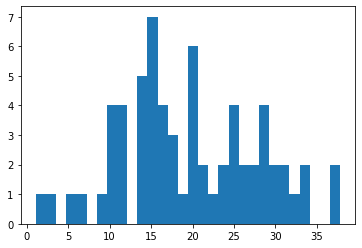

In [136]:
x = harden['GmSc']
_ = plt.hist(x, bins=30)
# As you can see from the histogram below which is very spread out,
# std value itself is really high which is 8.16 according to the calculation above.

5)

In [137]:
m = smf.ols(formula='GmSc ~ FGA', data=harden).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     9.678
Date:                Fri, 05 May 2023   Prob (F-statistic):            0.00280
Time:                        23:50:39   Log-Likelihood:                -224.11
No. Observations:                  65   AIC:                             452.2
Df Residuals:                      63   BIC:                             456.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8748      3.582      2.477      0.016       1.716      16.034
FGA            0.7037      0.226      3.111      0.003       0.252       1.156
==============================================================================
Omnibus:                        0.246   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.198
Skew:                          -0.127   Prob(JB):                        0.906
Kurtosis:                       2.905   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(a) Assuming harden's field goal attempts value is zero, game score tends to be around 8.87.
(b) Assuming that everything else is constant, one unit change in FGA value which would be one more goal attempts in the game by harden causes 0.7037 change in the game score. And it is statistically significant.

6)

In [138]:
m = smf.ols(formula='GmSc ~ FG + FGA', data=harden).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     45.30
Date:                Fri, 05 May 2023   Prob (F-statistic):           7.49e-13
Time:                        23:50:39   Log-Likelihood:                -199.48
No. Observations:                  65   AIC:                             405.0
Df Residuals:                      62   BIC:                             411.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9917      2.472      3.637      0.001       4.049      13.934
FG             3.0427      0.363      8.383      0.000       2.317       3.768
FGA           -0.5523      0.216     -2.553      0.013      -0.985      -0.120
==============================================================================
Omnibus:                        0.422   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.069
Skew:                          -0.025   Prob(JB):                        0.966
Kurtosis:                       3.151   Cond. No.                         64.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(a) Assuming everything else is constant, the coefficient of FG means that if one unit of field goal increases, game score tend to change 3.0427 value. And this is statistically significant since the P value is 0.\
(b) Assuming that everything else is constant, the coefficient of FGA means that if one unit of field goal attempt increases, the game score value tend to decrease by -0.5523. This is also statistically significant since the P value is less than 0.05\
(c) The fact that the second model contains the value of field goal, when you think about it clearly one unit of field goal would definately be more influencial than one unit of field goal attempt when it comes to rating game scores. Therefore, in the second model since it also contains another independent variable FG the FGA coefficient could have a negative value.
(d) R^2 value is 0.594 which is higher than the previous value of 0.133. This means that the percentage of variance in the outcome that is explained by the predictor variables increased which means the second model fits better with the data.

In [139]:
harden.rename(columns = {'3P':'three_point'}, inplace = True)
harden.rename(columns = {'3PA':'three_point_attempts'}, inplace = True)

7)

In [206]:
harden['three_point'] = pd.to_numeric(harden['three_point'], downcast="float")
harden['three_point_attempts'] = pd.to_numeric(harden['three_point_attempts'], downcast="float")
m = smf.ols(formula='GmSc ~ FG + FGA + three_point + three_point_attempts + FT + FTA + ORB +\
DRB + AST + STL + BLK + TOV + PF', data=harden).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.221e+15
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        00:13:41   Log-Likelihood:                 855.84
No. Observations:                  65   AIC:                            -1684.
Df Residuals:                      51   BIC:                            -1653.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.619e-07   4.61e-07      1.220      0.228   -3.63e-07    1.49e-06
FG                       2.4000    4.5e-08   5.33e+07      0.000       2.400       2.400
FGA                     -0.7000   2.98e-08  -2.35e+07      0.000      -0.700      -0.700
three_point              1.0000   7.71e-08    1.3e+07      0.000       1.000       1.000
three_point_attempts -5.117e-08   5.07e-08     -1.010      0.317   -1.53e-07    5.05e-08
FT                       1.4000   8.59e-08   1.63e+07      0.000       1.400       1.400
FTA                     -0.4000   7.09e-08  -5.64e+06      0.000      -0.400      -0.400
ORB                      0.7000   6.47e-08   1.08e+07      0.000       0.700       0.700
DRB                      0.3000   3.05e-08   9.83e+06      0.000       0.300       0.300
AST                      0.7000   2.46e-08   2.85e+07      0.000       0.700       0.700
STL                      1.0000   6.99e-08   1.43e+07      0.000       1.000       1.000
BLK                      0.7000   9.87e-08   7.09e+06      0.000       0.700       0.700
TOV                     -1.0000   4.13e-08  -2.42e+07      0.000      -1.000      -1.000
PF                      -0.4000   5.43e-08  -7.37e+06      0.000      -0.400      -0.400
==============================================================================
Omnibus:                        2.127   Durbin-Watson:                   1.289
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                2.005
Skew:                          -0.418   Prob(JB):                        0.367
Kurtosis:                       2.793   Cond. No.                         182.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(a)standard errors in this model tend to look really small since all the values are around 4.61e-07 to 4.13e^-08 which means that the means are closer together and less spread out. The t values which comparably seem to be very large the evidence against the null hypothesis is also large.\
(b)R squared is 1.000 in this model this shows that the regression line approximates the actual data very well. This also means that the accuracy on the game score calculated is high.\
(c) Turnover has a coefficient of -1 which means that when everything else is constant and turnover increases by one unit, the team loses gamescore by -1 which is bad for your team.

8)

I got the same formula except for the Field Goals Made which was 2.4 on my regression analysis above. In the formula it says it's 0.4 and I tried to fix this, but couldn't find any specific error...

### 3) Interpret regression results in the literature

1)

The estimate coefficient being -0.47 represents the PHQ-9 rate goes by -0.47 low by having a partner assuming everything else is constant in the conditions. However, having a partner is actually not effective since the p value of 'Has Partner' isn't smaller than 0.017. Therefore, not statistically significant and we reject null.

2)

Since WSAS estimate is 0.09 which means that everything else is considered constant when WSAS rate tend to increase by one unit, the PHQ-9 score will increase by 0.09 which means the worse in mental health. However, result is not statistically significant (p value smaller than 0.017), so we can not tell if covid had a positive impact on people's mental health according to the data.

3)

The estimate coefficient for financial distress on the chart is 2.32 which means that PHQ-9 score increases 2.32 if financial distress increases by one unit assuming everything else remains constant. This Financial distress is statistically significant since p value is smaller than 0.017 which tells that this analysis is meaningful.

### This PS took about 6 hrs in total!